In [89]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
# trajectories = gp.read_file('./data/trajectories/trajs.shp')
# trajectories.set_index('id', drop=True, inplace=True)
# all_edges = gp.read_file('./ground-map/map/all_edges.shp')
# all_edges.set_index('id', drop=True, inplace=True)

In [121]:
matches = pd.read_csv('./data/mr.csv', sep=';', index_col='id', engine='python')
edges = gp.read_file('./data/edges.shp')
edges.set_index('id', drop=True, inplace=True)
unmatched_indices = matches[matches.unmatch == True].index

In [120]:
matches[matches.unmatch == True][matches[matches.unmatch == True].cpath.notna()]

,opath,error,offset,cpath,ep,tp,sum_score,unmatch
id,,,,,,,,
1,"2912,2912,2912,629,631","0.000653281,0.000525503,0.000398248,0.00023958...","0.00130923,0.00130923,0.00130923,0.000129297,0","2912,629,631","0.19267,0.344528,0.542272,0.801322,0.483766","0,0.00771679,0.00771679,0.994514,0.332861",2.364558,True
11,"3319,3319,3319,3319,3366","0.000800415,0.000643573,0.000486731,0.00032989...","0.00141067,0.00143094,0.00145122,0.00147149,0","3319,3366","0.0844082,0.202261,0.400861,0.657095,0.855662","0,0.133677,0.133677,0.133677,0.776067",2.200287,True
20,"2821,2821,712,712,712","0.000885431,0.00083868,0.000785252,0.000730138...","0.000347636,0.000817389,0.000382632,0.00085147...","2821,8768,712","0.0485516,0.0662642,0.0926135,0.127831,0.172352","0,0.995094,0.97575,0.993176,0.993176",0.507612,True
21,"1531,5956,1530,5955,5955","0.00054949,0.000472579,0.00038641,0.000304613,...","6.37135e-05,7.44197e-05,8.15223e-05,7.67e-05,7...","1531,5956,1530,5955","0.311899,0.42242,0.562061,0.699046,0.700658","0,0.490958,0.448184,0.476362,0.0266404",2.696084,True
30,"3326,1548,1548,1548,1548","0.000637611,0.000302776,0.000428575,0.00055445...","0.00167448,0,2.57435e-05,5.83267e-05,9.09098e-05","3326,3331,1548","0.208311,0.702062,0.492263,0.305376,0.167636","0,0.270404,0.20411,0.25631,0.25631",1.875648,True
...,...,...,...,...,...,...,...,...
899,"7174,7174,7174,7174,5252","0.000535039,0.000520098,0.000505157,0.00049021...","0.00012012,0.000208655,0.000297191,0.000385726,0","7174,5252","0.331342,0.352124,0.373566,0.39563,0.413403","0,0.986211,0.986211,0.986211,0.379168",1.866065,True
907,"1837,1837,1837,1837,1272","0.000383494,0.000432356,0.000491876,0.00055865...","0.00108412,0.00108412,0.00108412,0.00108412,0","1837,1272","0.566952,0.486119,0.393148,0.299908,0.215793","0,0.0113604,0.0113604,0.0113604,0.0113604",1.961920,True
908,"1838,1838,1265,1264,1254","0.000786217,0.000785942,0.000745308,0.00036147...","0.00128776,0.00166239,0,8.20965e-05,0.000410089","1838,1247,1250,1297,1265,1297,1264,1254","0.0920732,0.0922272,0.117254,0.603997,0.999913","0,1,0.177661,0.745688,0.507577",1.905464,True


In [75]:
unmatched_edges = edges.loc[unmatched_indices]

In [76]:
unmatched_edges

,geometry
id,
918,"LINESTRING (51.30827 35.75478, 51.30794 35.755..."
928,"LINESTRING (51.33617 35.75549, 51.33668 35.755..."
3253,"LINESTRING (51.33684 35.74332, 51.33704 35.743..."
3263,"LINESTRING (51.33761 35.74320, 51.33787 35.743..."
3265,"LINESTRING (51.33761 35.74320, 51.33760 35.742..."
3270,"LINESTRING (51.33757 35.74194, 51.33758 35.742..."
1434,"LINESTRING (51.32847 35.75196, 51.32899 35.752..."
1555,"LINESTRING (51.29067 35.75231, 51.29063 35.752..."
3485,"LINESTRING (51.33638 35.74183, 51.33640 35.741..."


In [60]:
matches

,opath,error,cpath,ep,tp,score,unmatch
id,,,,,,,
915,"120,120,120,120,120","4.33977e-05,3.70084e-05,3.06192e-05,2.423e-05,...",120,"0.992759,0.994729,0.996389,0.997737,0.998773","0,0.996662,0.996662,0.996662,0.996662",0.993415,True
2286,"4348,4348,4348,4348,4421","6.16627e-06,6.62636e-06,7.08645e-06,7.54654e-0...","4348,4421","0.999853,0.999831,0.999806,0.99978,0.999374","0,0.999991,0.999991,0.999991,0.951822",0.990094,True
1,"2912,2912,2912,629,631","0.000653281,0.000525503,0.000398248,0.00023958...","2912,629,631","0.19267,0.344528,0.542272,0.801322,0.483766","0,0.00771679,0.00771679,0.994514,0.332861",0.231493,True
3199,"8080,6011,14,8071,15","0.000150008,0.000114315,0.000542945,0.00030490...",NaN,"0.916834,0.950825,0.320624,0.69856,0.993708","0,0.261501,1.39356e-312,0.326082,0.886926",0.454922,True
458,"5635,5635,5635,5635,5635","9.42136e-06,8.66317e-06,7.90497e-06,7.14678e-0...",5635,"0.999658,0.99971,0.999759,0.999803,0.999843","0,0.999983,0.999983,0.999983,0.999983",0.999741,True
...,...,...,...,...,...,...,...
1367,"3454,3454,3454,3454,3454","6.9269e-05,4.92403e-05,2.92115e-05,9.18272e-06...",3454,"0.981656,0.990688,0.996713,0.999675,0.999546","0,0.960827,0.960827,0.960827,0.960827",0.962422,True
1368,"2285,2285,2285,2285,2285","0.00016118,0.000141208,0.000121236,0.000101264...",2285,"0.904617,0.925945,0.944863,0.961204,0.974823","0,0.961054,0.961054,0.961054,0.961054",0.912638,True
1369,"2285,2285,2285,2285,2285","8.12924e-05,9.87031e-05,0.000116114,0.00013352...",2285,"0.974823,0.963106,0.949306,0.933518,0.915848","0,0.97603,0.97603,0.97603,0.97603",0.929286,True


In [168]:
nan_indices

{391,
 392,
 2567,
 2570,
 2577,
 2578,
 3263,
 3264,
 3265,
 3270,
 3505,
 3506,
 3605,
 3610}

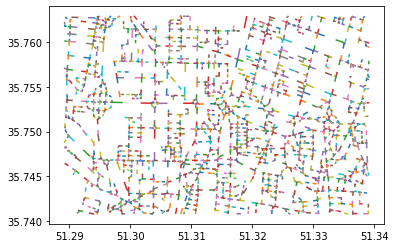

In [101]:
for index, row in unmatched_edges.iterrows():
    coords = list(row.geometry.coords)
    plt.plot([coords[0][0], coords[1][0]], [coords[0][1], coords[1][1]], c='r')

In [14]:
unmatch_radius = pd.read_csv('map-updating-Peyman-Baghershahi-winter2021/data/unmatch/unmatched/unmatched.csv', sep=',', engine='python')

In [122]:
matches['sum_score'] = matches['ep'].apply(
    lambda e: sum([float(x) for x in e.split(',')]) if pd.notna(e) else np.nan)

/home/peyman/anaconda3/envs/conda_env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

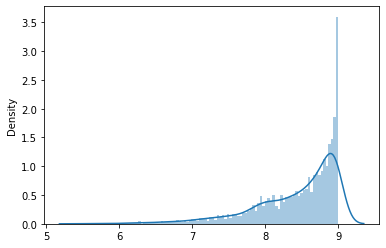

In [123]:
sn.distplot(matches.sum_score.values, bins=100)
# len(matches[matches.sum_score.notna()].sum_score.values)

In [101]:
pd.isna(np.nan)

True

In [98]:
matches_20 = pd.read_csv('./data/mr.csv', sep=';', index_col='id', engine='python')

In [181]:
matches_100.loc[16467]

,error,cpath,ep,tp,score,unmatch,sum_score
id,,,,,,,
16467,"2.42273e-05,2.44444e-05","7417,7416","0.997738,0.997697","0,0.992543","0.997738,0.990257173471",False,1.987995
16467,"2.59196e-05,1.65205e-05,3.97403e-05,3.58708e-0...","3188,7427,7423,7422,7421,7420","0.997411,0.998947,0.993925,0.995047,0.992357","0,0.995989,0.999005,0.99975,0.998292","0.997411,0.994940223583,0.992936044625,0.99479...",False,4.970748
16467,"8.88871e-06,2.62155e-05,2.6889e-05,2.76227e-05...","7357,58,8896,4333","0.999695,0.997352,0.997214,0.99706,0.997095","0,0.999235,0.99995,0.99995,0.99971","0.999695,0.99658902572,0.9971641393,0.99701014...",False,4.987264
16467,"2.47116e-05,2.04556e-05,1.97374e-05,1.95716e-05","7351,7347","0.997646,0.998387,0.998498,0.998523","0,0.986112,0.999988,1","0.997646,0.984521401344,0.9984860180239999,0.9...",False,3.979176


In [180]:
trajectories.loc[16467]

,bearing,speed,geometry
id,,,
16467,"197.5456,197.5456,197.39459,197.39459,197.39459","36.1126584,38.5094232,48.8202336,49.518468,52....","LINESTRING (51.31728 35.75744, 51.31724 35.757..."
16467,"193.22138999999999,193.22138999999999","54.2730096,54.2730096","LINESTRING (51.31644 35.75518, 51.31642 35.75511)"
16467,"180.26639,180.26706000000001,180.2670600000000...","54.1093356,56.7275508,56.7275508,57.1979142,54...","LINESTRING (51.31428 35.74866, 51.31428 35.747..."
16467,"181.76022,181.76022,181.76022,181.76622","54.597513600000006,54.9553608,54.3495420000000...","LINESTRING (51.31427 35.74720, 51.31427 35.747..."


In [148]:
matches_100

,error,cpath,ep,tp,unmatch,score
id,,,,,,
16467,"2.42273e-05,2.44444e-05","7417,7416","0.997738,0.997697","0,0.992543",False,"0.997738,0.990257173471"
12212,"3.34655e-05,1.51088e-05","7540,4773,6931,4779,4784","0.995688,0.99912","0,0.994791",False,"0.995688,0.99391558392"
12167,"9.50637e-06,1.39128e-05,1.15077e-05,2.05497e-05",6169,"0.999651,0.999253,0.999489,0.998372","0,0.997067,0.999179,0.99899",False,"0.999651,0.9963221909509999,0.998668419531,0.9..."
2512,"3.72388e-06,1.52149e-06,5.45779e-07",313,"0.999946,0.999991,0.999999","0,0.999982,0.999858",False,"0.999946,0.999973000162,0.999857000142"
0,"3.81846e-05,1.04213e-05,5.58588e-06","7483,1493,5457,7484,1011,7485,1519,7486","0.99439,0.999581,0.99988","0,0.974617,0.997001",False,"0.99439,0.974208635477,0.99688135988"
...,...,...,...,...,...,...
5625,"2.05577e-05,1.46701e-05",3396,"0.998371,0.99917","0,0.999864",False,"0.998371,0.99903411288"
22713,"3.00851e-07,9.29802e-08,2.45744e-06,1.00913e-0...","3396,1103","1,1,0.999977,0.999607,0.999759","0,0.999994,0.999364,0.999913,0.999444",False,"1.0,0.999994,0.9993410146280001,0.999520034191..."
11550,"1.07934e-05,9.20532e-07,1.20846e-06,1.07349e-0...","3396,1103","0.999551,0.999997,0.999994,0.999996,0.999662","0,0.999716,0.999563,0.999998,0.999822",False,"0.999551,0.9997130008520001,0.999557002622,0.9..."


In [127]:
matches_100.loc[12167].iloc[0]['score']

'0.999651,0.999253,0.999489,0.9983720,0.997067,0.999179,0.99899'

In [100]:
matches_100['tp_list'] = matches_100['tp'].apply(
    lambda e: [float(x) for x in e.split(',')[1:]] if pd.notna(e) else [21/111120])

In [152]:
matches_100['unmatch'] = matches_100['error_list'].apply(
    lambda e: [x>(20/111120) for x in e]
)

/home/peyman/anaconda3/envs/conda_env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

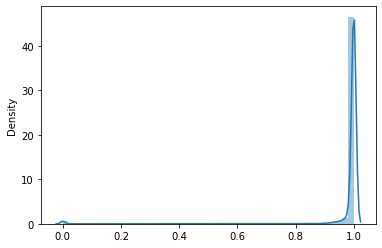

In [101]:
import seaborn as sn
a = np.concatenate(list(matches_100['tp_list'].values))
sn.distplot(a)

In [111]:
d = 3/111120
sigma = 40/111120
print(d, sigma)
print(np.exp(-0.5*(d/sigma)))
print(np.e**(-(d**2)/(2*(sigma**2)))/(np.sqrt(2*np.pi)*sigma))

2.6997840172786177e-05 0.0003599712023038157
0.9631944177208218
1105.1490482056272


In [82]:
(0.0077-0.0048)*111120

322.24800000000005